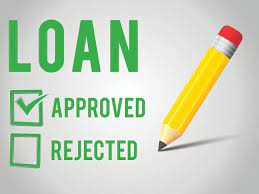

# About Dataset

##### Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. 
##### These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others.

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

### Loading the dataset 

In [3]:
df =  pd.read_csv('loanstatuspred_dataset.csv')

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Data_Preprocessing

In [6]:
# total rows and columns in the dataset
df.shape

(614, 13)

In [8]:
# checking the number of missing values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
# drop all the missing values
df = df.dropna()

In [10]:
# agin checking the number of missing values
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
# Converting data_ we will do Label_encoding
df.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [13]:
 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [14]:
# Dependent column values
df['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [52]:
# replace  3+ with 4
df = df.replace(to_replace='3+', value=4)

In [53]:
df['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

### Data_Visualization

<AxesSubplot:xlabel='Education', ylabel='count'>

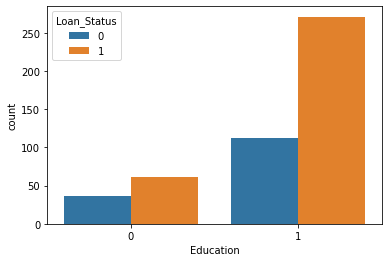

In [40]:
# Education vs Loan_Status
sns.countplot(x='Education',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Married', ylabel='count'>

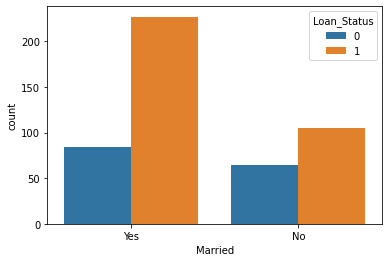

In [19]:
# marital status & Loan Status
sns.countplot(x='Married',hue='Loan_Status',data=df)

In [20]:
# convert categorical columns to numerical values
df.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

### Spliting the Data

In [23]:
# separating the data and label
X = df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y = df['Loan_Status']

### Train Test Split

In [41]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=Y,random_state=2)

In [42]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (384, 11) (96, 11)


### Training the model:

Support Vector Machine Model

In [43]:
classifier = svm.SVC(kernel='linear')

In [44]:
#training the support Vector Macine model
classifier.fit(X_train,y_train)

SVC(kernel='linear')

### Model Evaluation

In [45]:
# accuracy score on training data
X_train_prediction = classifier.predict(X_train)
train_data_accuray = accuracy_score(X_train_prediction,y_train)

In [49]:
print('Accuracy on Training_Data : ', train_data_accuray)

Accuracy on Training_Data :  0.7786458333333334


In [50]:
# accuracy score on training data
X_test_prediction = classifier.predict(X_test)
test_data_accuray = accuracy_score(X_test_prediction,y_test)

In [51]:
print('Accuracy on Test_Data : ', test_data_accuray)

Accuracy on Test_Data :  0.8125
